In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from astropy.io import fits
import pylab
from scipy import interpolate
import sys
import time

%matplotlib inline

//anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
hdulist1 = fits.open('testQimage1.fits')  # I band image
hdulistPSF = fits.open('images/psf_178.168914766_-0.501176508188.fits')
Qlist = fits.open('QTOTAL.fits')
hdulistQ_G = fits.open('images/Q_178.168914766_-0.501176508188_GBAND.fits')
hdulistQ_R = fits.open('images/Q_178.168914766_-0.501176508188_RBAND.fits')
# I band above
hdulistQ_Z = fits.open('images/Q_178.168914766_-0.501176508188_ZBAND.fits')
hdulistQ_Y = fits.open('images/Q_178.168914766_-0.501176508188_YBAND.fits')
hdulistPSF_G = fits.open('images/psf_178.168914766_-0.501176508188_GBAND.fits')
hdulistPSF_R = fits.open('images/psf_178.168914766_-0.501176508188_RBAND.fits')
hdulistPSF_Z = fits.open('images/psf_178.168914766_-0.501176508188_ZBAND.fits')
hdulistPSF_Y = fits.open('images/psf_178.168914766_-0.501176508188_YBAND.fits')




# 4 arcsec SW SH
# and trim to 40, 40


In [3]:
hdulist1.info()
hdulistPSF.info()
hdulistQ_G.info()
#hdulistQ_R.info()
#hdulistQ_Z.info()
#hdulistQ_Y.info()
hdulistPSF_G.info()
hdulistPSF_R.info()
hdulistPSF_Z.info()
hdulistPSF_Y.info()

Filename: testQimage1.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      21   ()              
1    IMAGE       ImageHDU        34   (120, 120)   float32   
2                ImageHDU         5   ()              
3                ImageHDU         5   ()              
Filename: images/psf_178.168914766_-0.501176508188.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      16   (43, 43)     float64   
Filename: images/Q_178.168914766_-0.501176508188_GBAND.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      21   ()              
1    IMAGE       ImageHDU        34   (48, 49)     float32   
2                ImageHDU         5   ()              
3                ImageHDU         5   ()              
Filename: images/psf_178.168914766_-0.501176508188_GBAND.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      16   (43, 41) 

In [4]:
im1 = hdulist1[1].data
psf = hdulistPSF[0].data
QG = hdulistQ_G[1].data
QR = hdulistQ_R[1].data
QY = hdulistQ_Y[1].data
QZ = hdulistQ_Z[1].data
PG = hdulistPSF_G[0].data
PR = hdulistPSF_R[0].data
PZ = hdulistPSF_Z[0].data
PY = hdulistPSF_Y[0].data

QG = QG[4:44, 4:44] # make into 40 x 40 square
QR = QR[4:44, 4:44]
QY = QY[4:44, 4:44]
QZ = QZ[4:44, 4:44]
size1 = im1.shape
sizePsf = psf.shape
sizeg = QG.shape
sizer = QR.shape
sizey = QY.shape
sizez = QZ.shape
print sizeg
#print sizer


cols = Qlist[1].columns
quasars = Qlist[1].data 
RA = quasars['ra']
DEC = quasars['dec']
Z = quasars['user.Z']
print Z
print len(Z)


# IN THE INTEREST OF TIME, only perform calculation on quasars with Z < 1 
lowZ = sum(i < 1 for i in Z)
print lowZ

(40, 40)
[ 0.83312565  2.68        2.86686182 ...,  2.40989614  0.85340369
  1.14582658]
9375
2096


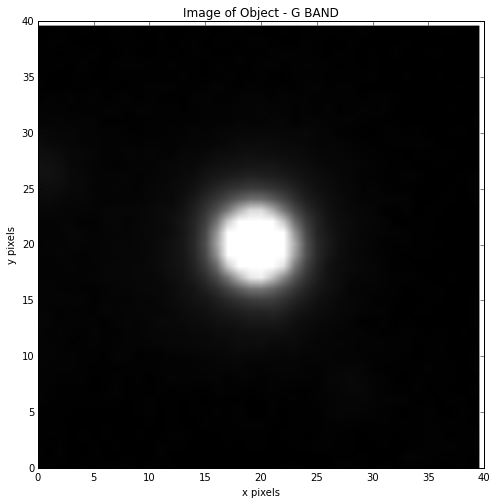

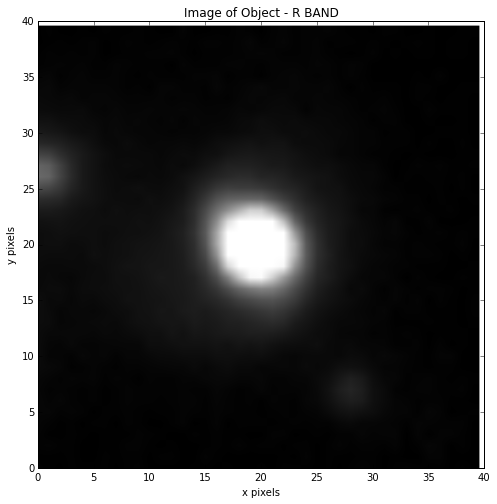

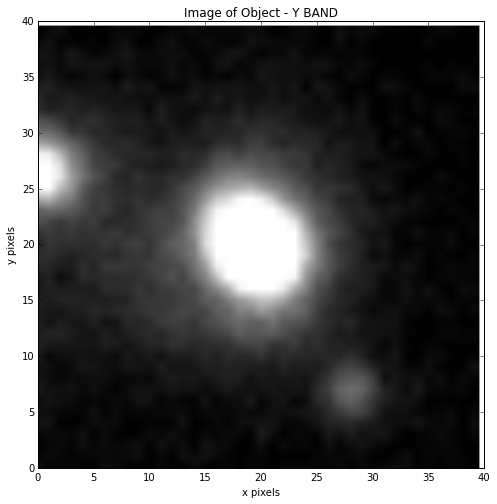

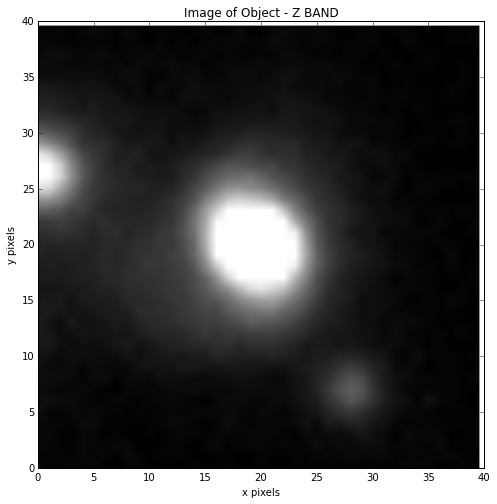

In [5]:
pylab.figure(figsize=(8,8))
pylab.gray()
pylab.imshow(QG, vmin = 0, vmax = 10)

pylab.xlabel('x pixels')
pylab.ylabel('y pixels')
pylab.title("Image of Object - G BAND")
pylab.ylim([0, sizeg[0]])
pylab.xlim([0, sizeg[1]])
plt.show()

#############

pylab.figure(figsize=(8,8))
pylab.gray()
pylab.imshow(QR, vmin = 0, vmax = 10)

pylab.xlabel('x pixels')
pylab.ylabel('y pixels')
pylab.title("Image of Object - R BAND")
pylab.ylim([0, sizer[0]])
pylab.xlim([0, sizer[1]])
plt.show()

#############

pylab.figure(figsize=(8,8))
pylab.gray()
pylab.imshow(QY, vmin = 0, vmax = 10)

pylab.xlabel('x pixels')
pylab.ylabel('y pixels')
pylab.title("Image of Object - Y BAND")
pylab.ylim([0, sizey[0]])
pylab.xlim([0, sizey[1]])
plt.show()

#############

pylab.figure(figsize=(8,8))
pylab.gray()
pylab.imshow(QZ, vmin = 0, vmax = 10)

pylab.xlabel('x pixels')
pylab.ylabel('y pixels')
pylab.title("Image of Object - Z BAND")
pylab.ylim([0, sizez[0]])
pylab.xlim([0, sizez[1]])
plt.show()

In [6]:
re_val = np.linspace(0, 20, 40) # In pixels.

n_val = [0.500000, 0.511646, 0.523564, 0.535760, 0.548239, 0.561009, 0.574077, 0.587449, 0.601132, 0.615134, 
        0.629463, 0.644125, 0.659128, 0.674481, 0.690192, 0.706269, 0.722720, 0.739554, 0.756781, 0.774408, 0.792447,
        0.810905, 0.829793, 0.849122, 0.868900, 0.889140, 0.909850, 0.931044, 0.952730, 0.974922, 0.997631, 1.02087, 
        1.04465, 1.06898, 1.09388, 1.11936, 1.14543, 1.17211, 1.19942, 1.22735, 1.25594, 1.28520, 1.31513, 1.34577,
        1.37711, 1.40919, 1.44202, 1.47560, 1.50998, 1.54515, 1.58114, 1.61797, 1.65566, 1.69422, 1.73368, 
        1.77407, 1.81539, 1.85768, 1.90095, 1.94523, 1.99054, 2.03690, 2.08435, 2.13290, 2.18258, 2.23342, 2.28544, 
        2.33868, 2.39315, 2.44889, 2.50594, 2.56431, 2.62404, 2.68516, 2.74770, 2.81171, 2.87720, 2.94422, 3.01280,
        3.08297, 3.15479, 3.22827, 3.30347, 3.38041, 3.45915, 3.53973, 3.62218, 3.70655, 3.79289, 3.88124,
        3.97164, 4.06415]

b_n_val = [0.693147,  0.715714, 0.738844, 0.762549, 0.786841, 0.811733, 0.837242, 0.863377, 0.890152, 0.917581, 
          0.945678, 0.97428497, 1.00414, 1.03425, 1.06512, 1.09675, 1.12917, 1.16237, 1.19659, 1.23123, 1.26689,
          1.3031702, 1.34075, 1.37902, 1.41820, 1.45832, 1.49938, 1.54143, 1.58446, 1.62852, 1.67362, 1.71979, 
          1.76705, 1.81544, 1.86496, 1.91565, 1.96754, 2.02064, 2.07499, 2.1305065, 2.18777, 2.24595, 2.30554, 2.36656, 
          2.4288661, 2.49298, 2.5581791, 2.62540, 2.69396, 2.76411, 2.83590, 2.90938, 2.98457, 3.06153, 3.14028, 
          3.22088, 3.30337, 3.38779, 3.47419, 3.56261, 3.65330, 3.74587, 3.84060, 3.93754, 4.03676, 4.13830, 4.24222, 
          4.34858, 4.45718, 4.5686032, 4.68289, 4.79944, 4.9186685, 5.04102, 5.16591, 5.29381, 5.42469, 5.55860, 5.69563,
          5.83585, 5.97934, 6.1266911, 6.2769893, 6.4308184, 6.58776, 6.74889, 6.91379, 7.08253, 7.25517, 7.4316895, 
          7.61277, 7.79751]




def sersic(n, b_n, re, r): 
    return np.e**(-b_n*((r / re)**(1./n) -1))



In [7]:
smallerIm = im1[40:80, 40:80]
smallsize = smallerIm.shape

In [8]:
# sum (data * psf) = A * sum(psf^2) + B sum(psf * galaxy)
# CHI SQUARED Fitting for galaxy and psf model data


def calcAB(re):
    data = smallerIm   # smallerIm
    tot = 0
    
    allChi = []
    allA = []
    allB = []
        
    
    for k in range(92):

        sum1 = 0.
        sum1A = 0.
        sum1B = 0.
        dist = 0.
        
        sum2 = 0.
        sum2A = 0.
        sum2B = 0.
        n = n_val[k]
        b_n = b_n_val[k]
        
        
        
        #print "For a n, b_n of: ", n, b_n 
        
        # tigher pixel range for images
        for i in range(8, 32):   # start from 1 to avoid accessing -1 for data, end at 40 cause data ends at 40
            for j in range(8, 32):
                r = np.sqrt((i -1 - 20)**2 + (j -1 - 20)**2) 
                # don't reculatuate each time!
                d = data[i-1][j-1]
                p = psf[i][j]
                s = sersic(n, b_n, re, r)
                sum1 +=  d * p  #data[i-1][j-1] * psf[i][j]
                sum1A += p * p #psf[i][j] * psf[i][j]
                sum1B += p * s  #psf[i][j] * sersic(n, b_n, re, r)
                
                sum2 +=  d * s  #data[i-1][j-1] * sersic(n, b_n, re, r)    
                sum2A += p * s  #sum1B     #psf[i][j] * sersic(n, b_n, re, r)  same as sum1B- don't recalculate
                sum2B += s * s  #(sersic(n, b_n, re, r))**2    
       
        # solve for A and B
        a = ([[sum1A, sum1B],[sum2A, sum2B]])
        b = ([sum1, sum2])
        
        A, B = np.linalg.solve(a, b)
        allA.append(A)
        allB.append(B)
        allChi.append(calcChi2(re, A, B, n, b_n, data))
        
    return chiMin(allChi, allA, allB)

    
    
def calcChi2(re, A, B, n, b_n, data):
    chi2 = 0.  
    for i in range (8, 32):
        for j in range(8, 32):
            r = np.sqrt((i -1 - 20)**2 + (j -1 - 20)**2)
            chi2 += (A * psf[i][j] + B * sersic(n, b_n, re, r) - data[i-1][j-1])**2
            
    return chi2

def chiMin(allChi, allA, allB):  
    allChi2 = np.asarray(allChi)
    lowIndex = np.where(allChi2 == allChi2.min())[0][0] ## the way np.where works weird
    return allChi[lowIndex], allA[lowIndex], allB[lowIndex], b_n_val[lowIndex], n_val[lowIndex]



In [3]:

chiList = []
nList = []
chiMini = sys.maxint
b_nact= 0
n_act = 0
Aact = 0
Bact = 0
Re_act = 0
print time.ctime()
for i in range(1, 40):
    chi, A, B, b_n, n = calcAB(re_val[i])
    #chiList.append(chi)
    #nList.append(n)
    if chi < chiMini:
        chiMini = chi
        Aact = A
        Bact = B
        b_nact = b_n
        n_act = n
        re_act = re_val[i]
print time.ctime()
print chiMini
print b_nact
print n_act
print re_act
print Bact
print Aact

#current best time: 38 seconds

Sat Apr 29 05:46:26 2017


NameError: name 'calcAB' is not defined

In [10]:
# b_n, n, and re are already determined- now calculate A and B and Chi

# reset everything
s1 = 0
s1A = 0
s1B = 0
s2 = 0
s2A = 0
s2B = 0


def calcBands(b_n, n, re, data, psf):
    s1 = 0
    s1A = 0
    s1B = 0
    s2 = 0
    s2A = 0
    s2B = 0
    for i in range(8, 32):   # start from 1 to avoid accessing -1 for data, end at 40 cause data ends at 40
        for j in range(8, 32):
            r = np.sqrt((i -1 - 20)**2 + (j -1 - 20)**2) 
            # don't reculatuate each time!
            d = data[i-1][j-1]
            p = psf[i][j]
            s = sersic(n, b_n, re, r)
            s1 +=  d * p
            s1A += p * p 
            s1B += p * s 
                
            s2 +=  d * s     
            s2A += p * s  
            s2B += s * s     
       
    # solve for A and B
    a = ([[s1A, s1B],[s2A, s2B]])
    b = ([s1, s2])
        
    A, B = np.linalg.solve(a, b)
    chi2 = 0.  
    
    for i in range (8, 32):
        for j in range(8, 32):
            r = np.sqrt((i -1 - 20)**2 + (j -1 - 20)**2)
            chi2 += (A * psf[i][j] + B * sersic(n, b_n, re, r) - data[i-1][j-1])**2
            
    print chi2, A, B # from return

In [11]:
calcBands(1.45832, 0.88914, 5.64102564103, QG, PG)
calcBands(1.45832, 0.88914, 5.64102564103, QR, PR)
calcBands(1.45832, 0.88914, 5.64102564103, QZ, PZ)
calcBands(1.45832, 0.88914, 5.64102564103, QY, PY)


1836.24452468 587.184566844 2.05540444433
2869.84027026 508.977376981 3.03161380509
435.858258682 542.035158064 3.89533218823
603.501161667 777.572640607 4.59140731321


In [12]:
def psf_profile(data, center):
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int) # rounds distances to integers
    #print r
    
    tbin = np.bincount(r.ravel(), data.ravel())
    #print tbin
    nr = np.bincount(r.ravel())
    #print nr
    psfprofile = tbin / nr
    #print psfprofile
    return psfprofile 





center = (21, 21)
psfplotI = A * psf_profile(psf, center)
psfplotG = 587.184566844 * psf_profile(PG, center)
psfplotR = 508.977376981 * psf_profile(PR, center)
psfplotZ = 542.035158064 * psf_profile(PZ, center)
psfplotY = 777.572640607 * psf_profile(PY, center)


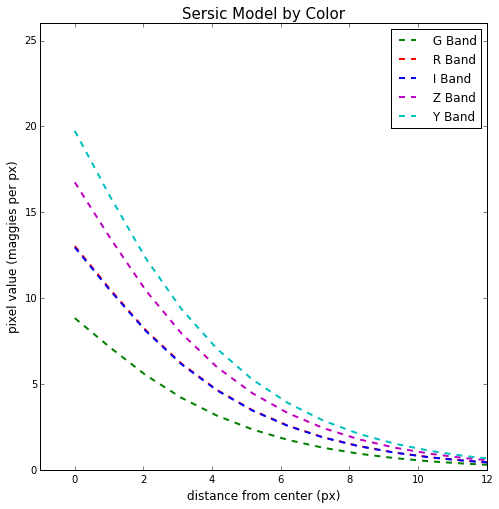

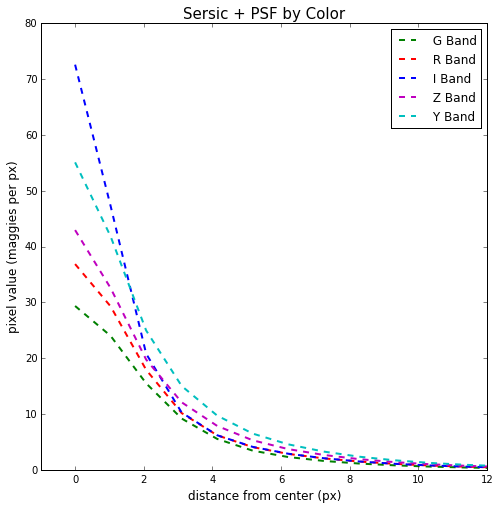

In [13]:
r = np.linspace(0, 30, 30)


Ggal = 2.05540444433 * sersic(0.88914, 1.45832, 5.64102564103, r)
Rgal = 3.03161380509 * sersic(0.88914, 1.45832, 5.64102564103, r)
Igal = 3.01459565927 * sersic(0.88914, 1.45832, 5.64102564103, r)
Zgal = 3.89533218823 * sersic(0.88914, 1.45832, 5.64102564103, r)
Ygal = 4.59140731321 * sersic(0.88914, 1.45832, 5.64102564103, r)


pylab.figure(figsize=(8,8))
plt.plot(r, Ggal, 'g--', label = " G Band", linewidth = 2.0 )
plt.plot(r, Rgal, 'r--', label = " R Band", linewidth = 2.0)
plt.plot(r, Igal, 'b--', label = " I Band", linewidth = 2.0)
plt.plot(r, Zgal, 'm--', label = " Z Band", linewidth = 2.0)
plt.plot(r, Ygal, 'c--', label = " Y Band", linewidth = 2.0)
pylab.xlabel('distance from center (px)', size = 12)
pylab.ylabel('pixel value (maggies per px)', size = 12)
pylab.title("Sersic Model by Color", size = 15)
pylab.ylim([0, 26])
pylab.xlim([-1, 12]) 
plt.legend()
plt.show()


pylab.figure(figsize=(8,8))
plt.plot(r, Ggal + psfplotG, 'g--', label = " G Band", linewidth = 2.0 )
plt.plot(r, Rgal + psfplotR, 'r--', label = " R Band", linewidth = 2.0)
plt.plot(r, Igal + psfplotI, 'b--', label = " I Band", linewidth = 2.0)
plt.plot(r, Zgal + psfplotZ, 'm--', label = " Z Band", linewidth = 2.0)
plt.plot(r, Ygal + + psfplotY, 'c--', label = " Y Band", linewidth = 2.0)
pylab.xlabel('distance from center (px)', size = 12)
pylab.ylabel('pixel value (maggies per px)', size = 12)
pylab.title("Sersic + PSF by Color", size = 15)
#pylab.ylim([0, 26])
pylab.xlim([-1, 12]) 
plt.legend()
plt.show()

In [14]:
Gmag = 27.0 - 2.5*np.log10(Ggal)     # maggies to magnitudes
Rmag = 27.0 - 2.5*np.log10(Rgal)
Imag = 27.0 - 2.5*np.log10(Igal)
Zmag = 27.0 - 2.5*np.log10(Zgal)
Ymag = 27.0 - 2.5*np.log10(Ygal)

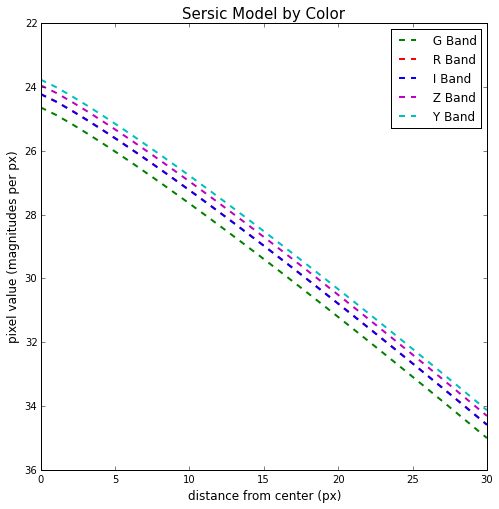

In [15]:
pylab.figure(figsize=(8,8))
plt.plot(r, Gmag, 'g--', label = " G Band", linewidth = 2.0 )
plt.plot(r, Rmag, 'r--', label = " R Band", linewidth = 2.0)
plt.plot(r, Imag, 'b--', label = " I Band", linewidth = 2.0)
plt.plot(r, Zmag, 'm--', label = " Z Band", linewidth = 2.0)
plt.plot(r, Ymag, 'c--', label = " Y Band", linewidth = 2.0)
pylab.xlabel('distance from center (px)', size = 12)
pylab.ylabel('pixel value (magnitudes per px)', size = 12)
pylab.title("Sersic Model by Color", size = 15)
pylab.ylim([36, 22])
#pylab.xlim([-1, 12]) 
plt.legend()
plt.show()
